In [1]:
from datasets.mnist import MNIST
import matplotlib.pyplot as plt

from nn.dataloader import DataLoader
from nn.model import Sequential
from nn.activations import relu, tanh, sigmoid
from nn.layers import Dense
from nn.loss import MeanSquaredError
from nn.optimizer import GradientDescent

from nn.preprocessing import categorical_encoding, transform_input_data

from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
# TODO: Handle that one-hot encoded y data is not 1-d array....

In [3]:
data = MNIST(mode='full')

All required files are exist!


In [4]:
train_data, test_data = data.dataset
X_train, y_train = train_data
X_test, y_test = test_data

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test_ = scaler.transform(X_test)

In [6]:
print(X_train.shape, y_train.shape)

(60000, 784) (60000,)


In [31]:
X_train[0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.41807799e-03, -5.75481961e-03, -4.08251693e-03, -4.08251693e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.08251693e-03, -4.70968827e-03, -8.79934640e-03, -1.15905591e-02,
       -1.47589798e-02, -1.92848546e-02, -2.46717975e-02, -2.90710271e-02,
       -3.05926583e-02, -3.11640127e-02, -3.19628719e-02, -3.02025355e-02,
       -3.13102175e-02, -2.83833960e-02, -2.31191906e-02, -1.91666260e-02,
       -1.67723008e-02, -1.09963601e-02, -8.32486080e-03, -4.38069356e-03,
        0.00000000e+00,  

In [7]:
batch_size = 32

nn = Sequential(
    input_shape = (batch_size, 784),
    layers = [
        Dense(128, activation='relu'),
        Dense(10, activation='sigmoid')
    ],
    optimizer=GradientDescent(0.1),
    loss=MeanSquaredError()
)

In [8]:
nn.info()

model: Sequential
------------------------------
Dense | (128,784) <(128, 1)> | relu
Dense | (10,128) <(10, 1)> | sigmoid
Optimizer: GradientDescent
loss: mean_squared_error


In [37]:
dl_train = DataLoader(X_train, y_train)

In [38]:
dl_train._data[0][0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.41807799e-03, -5.75481961e-03, -4.08251693e-03, -4.08251693e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.08251693e-03, -4.70968827e-03, -8.79934640e-03, -1.15905591e-02,
       -1.47589798e-02, -1.92848546e-02, -2.46717975e-02, -2.90710271e-02,
       -3.05926583e-02, -3.11640127e-02, -3.19628719e-02, -3.02025355e-02,
       -3.13102175e-02, -2.83833960e-02, -2.31191906e-02, -1.91666260e-02,
       -1.67723008e-02, -1.09963601e-02, -8.32486080e-03, -4.38069356e-03,
        0.00000000e+00,  

In [39]:
dl_train = dl_train.apply(to_y=True, fn=categorical_encoding)
# dl_train = dl_train.apply(to_x=True, fn=transform_input_data)

(60000,)


In [42]:
dl_train_b = dl_train.batch(batch_size, upsample=True)

Recieved shapes:
(60000, 784) (60000, 10)


In [66]:
dl_train_b._data[0].shape

(1875, 32, 784)

In [57]:
print(nn.weights.wl0.weights.mean())
print(nn.weights.wl1.weights.mean())

0.0050057546114305575
0.005023412709716303


In [77]:
for x, y in dl_train.data:
    print(x.shape, y.shape)
    break

(784, 32) (10, 32)


In [73]:
def transform(array: np.ndarray, b) -> np.ndarray:
    return np.array(
        list(
            map(
                lambda sample: sample.reshape(-1, b), array
                )
            )
        )

In [75]:
x = transform(dl_train_b._data[0], 32)
y = transform(dl_train_b._data[1], 32)

(10, 32)

In [106]:
nn.fit(dl_train_b, batch_size=batch_size, epochs=16)

<class 'nn.dataloader.DataLoader'> type as input data
Start training for 16 epochs


Epoch 1: 100%|██████████| 1875/1875 [00:03<00:00, 514.85samples/s]


mean_squared_error: 0.0007349451876394713


Epoch 2: 100%|██████████| 1875/1875 [00:03<00:00, 512.71samples/s]


mean_squared_error: 0.0007067386156452453


Epoch 3: 100%|██████████| 1875/1875 [00:03<00:00, 504.12samples/s]


mean_squared_error: 0.000680945621243776


Epoch 4: 100%|██████████| 1875/1875 [00:03<00:00, 511.18samples/s]


mean_squared_error: 0.0006573208484404256


Epoch 5: 100%|██████████| 1875/1875 [00:03<00:00, 504.26samples/s]


mean_squared_error: 0.0006357218989758816


Epoch 6: 100%|██████████| 1875/1875 [00:03<00:00, 511.27samples/s]


mean_squared_error: 0.0006156825735119954


Epoch 7: 100%|██████████| 1875/1875 [00:03<00:00, 509.09samples/s]


mean_squared_error: 0.0005971244705820281


Epoch 8: 100%|██████████| 1875/1875 [00:03<00:00, 503.08samples/s]


mean_squared_error: 0.0005799450256617208


Epoch 9: 100%|██████████| 1875/1875 [00:03<00:00, 507.12samples/s]


mean_squared_error: 0.0005639059254320901


Epoch 10: 100%|██████████| 1875/1875 [00:03<00:00, 508.89samples/s]


mean_squared_error: 0.0005488603603285675


Epoch 11: 100%|██████████| 1875/1875 [00:03<00:00, 507.11samples/s]


mean_squared_error: 0.0005347311738699525


Epoch 12: 100%|██████████| 1875/1875 [00:03<00:00, 500.01samples/s]


mean_squared_error: 0.00052143346057723


Epoch 13: 100%|██████████| 1875/1875 [00:03<00:00, 510.04samples/s]


mean_squared_error: 0.0005088938275017508


Epoch 14: 100%|██████████| 1875/1875 [00:03<00:00, 504.48samples/s]


mean_squared_error: 0.0004970726155708789


Epoch 15: 100%|██████████| 1875/1875 [00:03<00:00, 503.82samples/s]


mean_squared_error: 0.00048588259872980996


Epoch 16: 100%|██████████| 1875/1875 [00:03<00:00, 509.05samples/s]

mean_squared_error: 0.0004751955923450172


In [107]:
print(nn.weights.wl0.weights.mean())
print(nn.weights.wl1.weights.mean())
# print(nn.weights.wl2.weights.mean())

0.0027578309548495572
-0.03909852652638902


In [108]:
print(X_test_[0].shape)
X_test_ = transform_input_data(X_test_)
print(X_test_[0].shape)

(784, 1)
(784, 1)


Accuracy: 0.8949


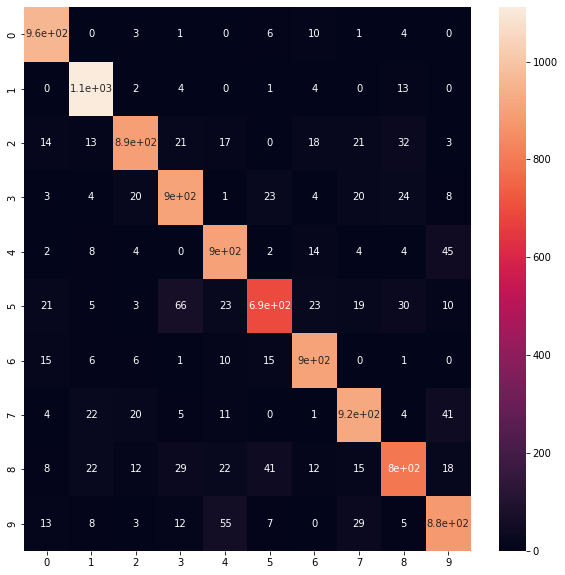

In [109]:
y_hats = []
for x_i in X_test_:
    y_hat = nn.predict(x_i)
    y_hats.append(np.argmax(y_hat))

acc = accuracy_score(y_test, y_hats)
print('Accuracy:', acc)

cm = confusion_matrix(y_test, y_hats)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True)
plt.show()

In [110]:
y_hats

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 4,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 0,
 7,
 2,
 7,
 1,
 3,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 2,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 4,
 2,
 7,
 4,
 2,
 4,
 3,
 0,
 7,
 0,
 2,
 7,
 1,
 7,
 3,
 7,
 9,
 7,
 9,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 4,
 3,
 1,
 4,
 1,
 9,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 1,
 3,
 9,
 7,
 4,
 4,
 4,
 9,
 8,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 2,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 8,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 4,
 0,
 1,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 7,
 9,
 3,
 9,
 0,
 3,
 5,
 7,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 7,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 8,
 8,
 7,
 2,
 6,
 0,
 6,
 4,
 2,
